<a href="https://colab.research.google.com/github/Ananthzeke/Deep-Learning/blob/main/Notebooks-Tensorflow/amil_vowels_classification_using_2DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying Tamil Vowels using 2D CNN
![]()
<p align="center">
  <img width="200" src="https://www.researchgate.net/profile/Upul-Sonnadara/publication/235337297/figure/tbl1/AS:667614825156624@1536183186141/12-Vowels-and-their-pronunciations.png" alt="Tamil Vowels">
</p>

### Importing the dataset
  - Dataset contains 3k tiff images  tamil vowels (அ	to ஔ).
  - Each letter consists of approximately 300 images.
  - Dataset can be dowloaded here: https://drive.google.com/file/d/1Jd_VJ4caCPaUAX3qQCbfzMQfEOyXUOJI/view?usp=sharing


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip raw_vowels_3K_images.zip

Archive:  raw_vowels_3K_images.zip
   creating: shuffled/
  inflating: shuffled/u28_001t07.tiff  
  inflating: shuffled/u28_001t06.tiff  
  inflating: shuffled/u28_001t04.tiff  
  inflating: shuffled/u28_001t03.tiff  
  inflating: shuffled/u40_000t07.tiff  
  inflating: shuffled/u28_001t01.tiff  
  inflating: shuffled/u31_000t03.tiff  
  inflating: shuffled/u28_000t08.tiff  
  inflating: shuffled/u28_000t07.tiff  
  inflating: shuffled/u28_000t05.tiff  
  inflating: shuffled/u40_000t03.tiff  
  inflating: shuffled/u40_000t02.tiff  
  inflating: shuffled/u28_000t02.tiff  
  inflating: shuffled/u40_000t01.tiff  
  inflating: shuffled/u17_010t07.tiff  
  inflating: shuffled/u17_010t04.tiff  
  inflating: shuffled/u17_010t03.tiff  
  inflating: shuffled/u17_010t02.tiff  
  inflating: shuffled/u17_009t07.tiff  
  inflating: shuffled/u17_009t06.tiff  
  inflating: shuffled/u17_008t08.tiff  
  inflating: shuffled/u17_007t01.tiff  
  inflating: shuffled/u17_006t09.tiff  
  inflating: shuffled/

In [ ]:
!ls drive/MyDrive/dataset

raw_vowels_3K_images.zip  shuffled


### Data visualization

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img=cv2.imread('drive/MyDrive/dataset/shuffled/u16_000t06.tiff',0)

In [4]:
img.shape

(124, 126)

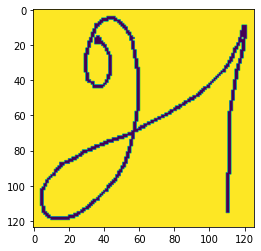

In [6]:
plt.imshow(img)

### Data Preprocessing

In [7]:
import os
import re

In [8]:
m=len(os.listdir("drive/MyDrive/dataset/shuffled")) # No. of training data
X=np.zeros((3000,128,128)) # intializing input x
Y=np.zeros((3000,1)) # intializing input y

In [9]:
i=0
ds_path=os.listdir('drive/MyDrive/dataset/shuffled') # list of path containing the images
np.random.seed(42)
np.random.shuffle(ds_path) # shuffling the path for a unbiased dataset 
for files in ds_path:
  img=cv2.imread('drive/MyDrive/dataset/shuffled/'+str(files),0)
  img=cv2.resize(img/255,(128,128)) # resizing and rescaling the images
  X[i]=img
  class_index=re.findall(r'\d\dt',files)[0][0:2]  # outputs the class of the image
  Y[i]=int(class_index)
  i+=1

In [10]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl

In [11]:
Y=to_categorical(Y) # one hot encoding 
Y.shape

### Train test split 

In [13]:
# 80% train and 20% test or val
x_train,x_test=X[:int(0.8*m)],X[int(0.8*m):] 
y_train,y_test=Y[:int(0.8*m)],Y[int(0.8*m):]

In [14]:
print(f'Train={x_train.shape},{y_train.shape}\nTest={x_test.shape}{y_test.shape}')

Train=(2400, 128, 128),(2400, 12)
Test=(600, 128, 128)(600, 12)


### converting the dataset to tensor slices

In [15]:
def tensor_dataset(x,y,batch_size=100):# helper func for better optimization in tensorflow
  return tf.data.Dataset.from_tensor_slices((x,y)).batch(batch_size) 

In [16]:
train_ds=tensor_dataset(x_train,y_train)
test_ds=tensor_dataset(x_test,y_test)

### Model

In [58]:
model=tf.keras.Sequential(
    [tfl.Conv2D(128,(5,5),input_shape=(128,128,1),activation='relu',padding='same'),
     tfl.MaxPooling2D(pool_size=(2, 2)),
     tfl.Dropout(0.2),
     tfl.Conv2D(64, (5, 5), activation='relu',padding='same'),
     tfl.MaxPooling2D(pool_size=(2, 2)),
    #  tfl.Conv2D(32, (5, 5), activation='relu',padding='same'),
    #  tfl.MaxPooling2D(pool_size=(2, 2)),
    #  tfl.Dropout(0.2),
     tfl.Conv2D(32, (5, 5), activation='relu',padding='same'),
     tfl.MaxPooling2D(pool_size=(2, 2)),
     tfl.Dropout(0.2),
     tfl.Flatten(),
     tfl.Dense(256,activation='relu'),
     tfl.Dense(12, activation='softmax')
    ])

In [59]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 64, 64, 128)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 64)        204864    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 32)       

In [60]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy']) # optimizer adam with learning rate=0.0001.

In [61]:
history=model.fit(train_ds, epochs=50,validation_data=test_ds,callbacks=tf.keras.callbacks.EarlyStopping(patience=5))

Epoch 1/50
24/24 [==============================] - 5s 172ms/step - loss: 2.4269 - accuracy: 0.0971 - val_loss: 2.3908 - val_accuracy: 0.1117
Epoch 2/50
24/24 [==============================] - 4s 166ms/step - loss: 2.2635 - accuracy: 0.2854 - val_loss: 1.9601 - val_accuracy: 0.6800
Epoch 3/50
24/24 [==============================] - 4s 166ms/step - loss: 1.1218 - accuracy: 0.7633 - val_loss: 0.5438 - val_accuracy: 0.8333
Epoch 4/50
24/24 [==============================] - 4s 167ms/step - loss: 0.4516 - accuracy: 0.8575 - val_loss: 0.3779 - val_accuracy: 0.8850
Epoch 5/50
24/24 [==============================] - 4s 167ms/step - loss: 0.3203 - accuracy: 0.8971 - val_loss: 0.3191 - val_accuracy: 0.9133
Epoch 6/50
24/24 [==============================] - 4s 167ms/step - loss: 0.2501 - accuracy: 0.9204 - val_loss: 0.2943 - val_accuracy: 0.9133
Epoch 7/50
24/24 [==============================] - 4s 167ms/step - loss: 0.1911 - accuracy: 0.9429 - val_loss: 0.2760 - val_accuracy: 0.9183
Epoch 

### Plotting the learning curves

In [70]:
history=history.history

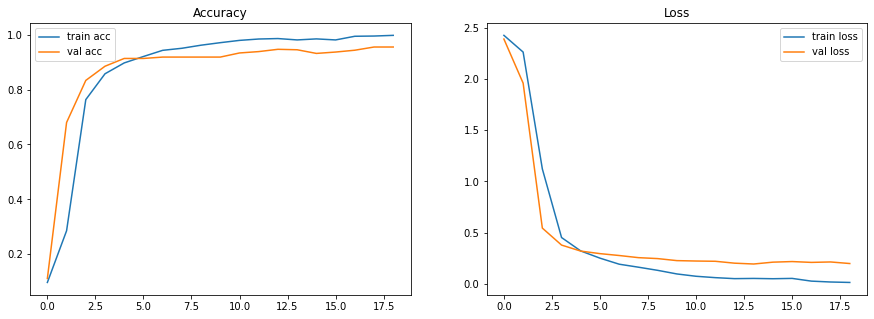

In [71]:
# accuracy curves
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["accuracy"],label="train acc")
plt.plot(history["val_accuracy"],label="val acc")
plt.legend()
# loss curves
plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"],label="train loss")
plt.plot(history["val_loss"],label="val loss")
plt.legend()

plt.show()


### Predicting the class

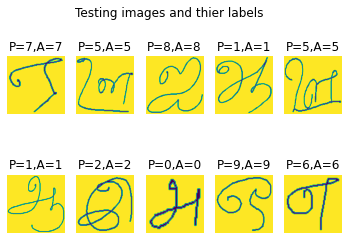

In [91]:
plt.suptitle('Testing images and thier labels')
for i in range(10):
  a=x_test[np.newaxis,i]
  predicted_class=np.argmax(model.predict(a))
  actual_class=np.argmax(y_test[i])
  plt.subplot(2,5,i+1,title=f'P={predicted_class},A={actual_class}')
  plt.imshow(x_test[i])
  plt.axis('off')
plt.show()